In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df= pd.read_csv('/home/bhaskar/Here_we_go_again/VS_code_ting/Bitch/Notebook/data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X= df.drop(columns='math score', axis=1)
y= df['math score']

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num = X.select_dtypes(include=['number']).columns.tolist()
cat = X.select_dtypes(include=['object']).columns.tolist()

from sklearn.compose import ColumnTransformer
preprocessing= ColumnTransformer([('scaler', StandardScaler(), num),
                                  ('encoder ', OneHotEncoder(drop='first', handle_unknown='ignore'), cat)])

X = preprocessing.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
# An evaluation function
def model_evalution(test,predicted):
    r2= r2_score(test,predicted)
    mse= mean_squared_error(test, predicted)
    mae= mean_absolute_error(test, predicted)
    rmse= np.sqrt(mse)

    return r2, mse, mae, rmse

In [24]:
models={
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "Ridge": Ridge(),
    "Laaso": Lasso(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}
model_list=[]
r2_list=[]

for name, model in models.items():
    print(f"The model is : {name} ")

    model.fit(X_train, y_train)
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    train_r2, train_mse, train_mae, train_rmse= model_evalution(y_train, y_train_pred)
    test_r2, test_mse, test_mae, test_rmse= model_evalution(y_test, y_test_pred)

    print("-"*36)
    print('TRAIN SET EVALUATION')
    print(f"R2 Score is -> {train_r2:.2f}")
    print(f"RMSE -> {train_rmse:.2f}")
    print('TEST SET EVALUATION')
    print(f"R2 score -> {test_r2:.2f}")
    print(f"RMSE -> {test_rmse:.2f}")
    print("="*35)
    print()
    model_list.append(name)
    r2_list.append(test_r2)

print("models evaluated-> {model_list}")


The model is : LinearRegression 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 0.87
RMSE -> 5.32
TEST SET EVALUATION
R2 score -> 0.88
RMSE -> 5.39

The model is : KNeighborsRegressor 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 0.86
RMSE -> 5.58
TEST SET EVALUATION
R2 score -> 0.78
RMSE -> 7.36

The model is : DecisionTreeRegressor 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 1.00
RMSE -> 0.28
TEST SET EVALUATION
R2 score -> 0.74
RMSE -> 8.03

The model is : RandomForestRegressor 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 0.98
RMSE -> 2.31
TEST SET EVALUATION
R2 score -> 0.85
RMSE -> 6.04

The model is : AdaBoostRegressor 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 0.85
RMSE -> 5.75
TEST SET EVALUATION
R2 score -> 0.85
RMSE -> 6.02

The model is : SVR 
------------------------------------
TRAIN SET EVALUATION
R2 Score is -> 0.80
RMSE -> 6.75


In [28]:
r2_index= r2_list.index(max(r2_list))

best_model= model_list[r2_index]
best_r2_score= r2_list[r2_index]

print(f" The best model is {best_model} with an r2 score o f {best_r2_score}")

 The best model is Ridge with an r2 score o f 0.8804513937125638


In [36]:
pd.DataFrame({"models": model_list,"r2_score": r2_list}).sort_values(by='r2_score',ascending=False)

,models,r2_score
6,Ridge,0.880451
0,LinearRegression,0.880433
4,AdaBoostRegressor,0.851184
3,RandomForestRegressor,0.850226
8,CatBoostRegressor,0.849801
7,Laaso,0.825320
9,XGBRegressor,0.820924
1,KNeighborsRegressor,0.777126
2,DecisionTreeRegressor,0.735327
5,SVR,0.713014


In [39]:
lin_model = Ridge()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.05


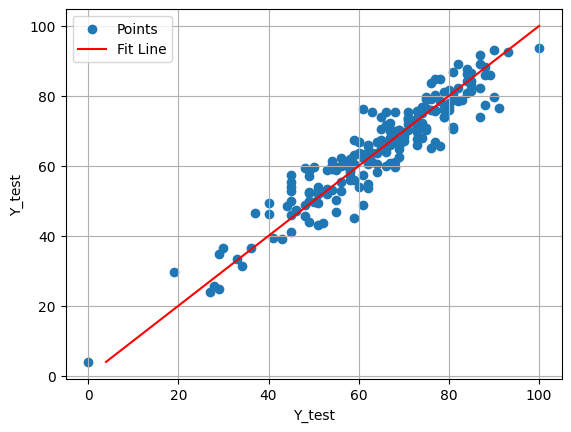

In [49]:
plt.scatter(y_test, y_pred, label= 'Points')
plt.plot([max(y_test),min(y_pred)],[max(y_test),min(y_pred)], color='red', label='Fit Line')
plt.xlabel('Y_test')
plt.ylabel('Y_test')
plt.legend()
plt.grid()
plt.show()

In [56]:
df_test_pred= pd.DataFrame({"Actual": y_test,
                            "Prediction": y_pred,
                            "Difference_between_actaul_and_prediction": y_test-y_pred})

df_test_pred


,Actual,Prediction,Difference_between_actaul_and_prediction
521,91,76.405205,14.594795
737,53,58.858134,-5.858134
740,80,76.963473,3.036527
660,74,76.776989,-2.776989
411,84,87.595617,-3.595617
...,...,...,...
408,52,43.528947,8.471053
332,62,62.163717,-0.163717
208,74,67.919929,6.080071
613,65,67.073265,-2.073265


,Actual,Prediction,Difference_between_actaul_and_prediction
521,91,76.405205,14.594795
737,53,58.858134,-5.858134
740,80,76.963473,3.036527
660,74,76.776989,-2.776989
411,84,87.595617,-3.595617
...,...,...,...
408,52,43.528947,8.471053
332,62,62.163717,-0.163717
208,74,67.919929,6.080071
613,65,67.073265,-2.073265
